In [3]:
#Import Turing, Distributions and StatsBase
using Turing, Distributions, StatsBase

# Import MCMCChain, Plots and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/saumya/.julia/packages/Turing/RZOZ8/src/Turing.jl:24


false

In [6]:
N = 500
s = zeros(N)
for i=3:N
    s[i] = rand(Normal(0, 1)) + 0.5*rand(Normal(0, 1)) + 0.4*rand(Normal(0, 1))
end

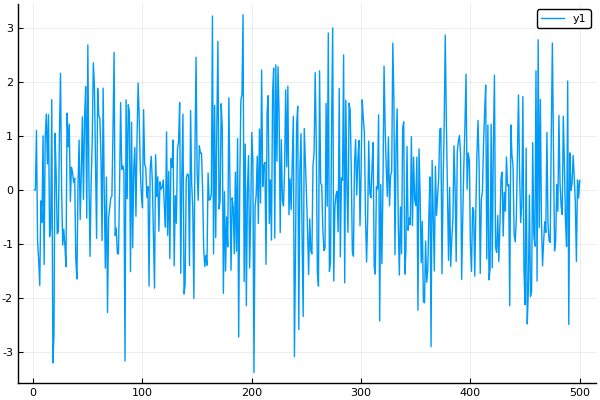

In [7]:
pyplot()
plot(s)

In [8]:
σ = 1
@model MA(x, N) = begin
    α ~ Normal(0,σ) 
    beta_1 ~ Uniform(0, 1)
    beta_2 ~ Uniform(0, 1)
    for t in 3:N
        μ = α + beta_1 * rand(Normal(0, 1)) + beta_2 * rand(Normal(0, 1)) 
        x[t] ~ Normal(μ, 0.1) 
    end
end;

In [9]:
# This is temporary while the reverse differentiation backend is being improved.
Turing.setadbackend(:forward_diff)

# Sample using HMC
chain = sample(MA(s, N), NUTS(500, 200, 0.65) )

┌ Info: [Turing] looking for good initial eps...
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:247
┌ Info: [Turing] found initial ϵ: 0.009036127198523272
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:239
┌ Info:  Adapted ϵ = 2.50022073872427e-71, std = [1.0, 1.0, 1.0]; 200 iterations is used for adaption.
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/adapt/adapt.jl:90


[NUTS] Finished with
  Running time        = 17.56684742499999;
  #lf / sample        = 0.0;
  #evals / sample     = 0.002;
  pre-cond. metric    = [1.0, 1.0, 1.0].


Object of type Chains, with data of type 500×9×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:500
Thinning interval = 1
Chains            = 1
Samples per chain = 500
internals         = elapsed, epsilon, eval_num, lf_eps, lf_num, lp
parameters        = beta_1, α, beta_2

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean     │ std       │ naive_se   │ mcse       │ ess    │
│     │ Symbol     │ Float64  │ Float64   │ Float64    │ Float64    │ Any    │
├─────┼────────────┼──────────┼───────────┼────────────┼────────────┼────────┤
│ 1   │ beta_1     │ 0.369105 │ 0.0398256 │ 0.00178106 │ 0.00406692 │ 6.4685 │
│ 2   │ beta_2     │ 0.353984 │ 0.0395221 │ 0.00176748 │ 0.00399101 │ 6.4685 │
│ 3   │ α          │ -0.746   │ 0.289161  │ 0.0129317  │ 0.0331616  │ 6.4685 │

Quantiles

│ Row │ parameters │ 2.5%      │ 25.0%     │ 50.0%     │ 75.0%     │ 97.5%     │
│     │ Symbol     │ Float64   │ Float64

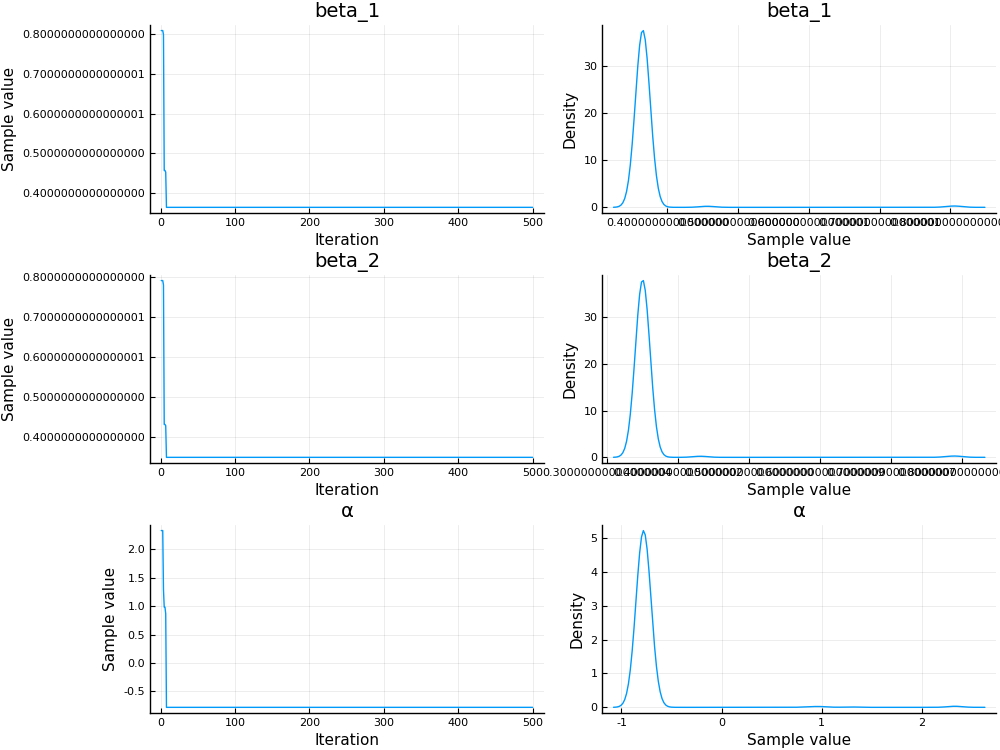

In [10]:
plot(chain)

In [18]:
show(chain)

Object of type Chains, with data of type 500×9×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:500
Thinning interval = 1
Chains            = 1
Samples per chain = 500
internals         = elapsed, epsilon, eval_num, lf_eps, lf_num, lp
parameters        = beta_1, α, beta_2

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean     │ std       │ naive_se   │ mcse       │ ess    │ r_hat   │
│     │ Symbol     │ Float64  │ Float64   │ Float64    │ Float64    │ Any    │ Any     │
├─────┼────────────┼──────────┼───────────┼────────────┼────────────┼────────┼─────────┤
│ 1   │ beta_1     │ 0.369105 │ 0.0398256 │ 0.00178106 │ 0.00406692 │ 6.4685 │ 1.00848 │
│ 2   │ beta_2     │ 0.353984 │ 0.0395221 │ 0.00176748 │ 0.00399101 │ 6.4685 │ 1.00825 │
│ 3   │ α          │ -0.746   │ 0.289161  │ 0.0129317  │ 0.0331616  │ 6.4685 │ 1.01124 │

Quantiles

│ Row │ parameters │ 2.5%      │ 25.0%     │ 50.0%     │ 75.0%     │ 97.5%     │
│     │ Sym

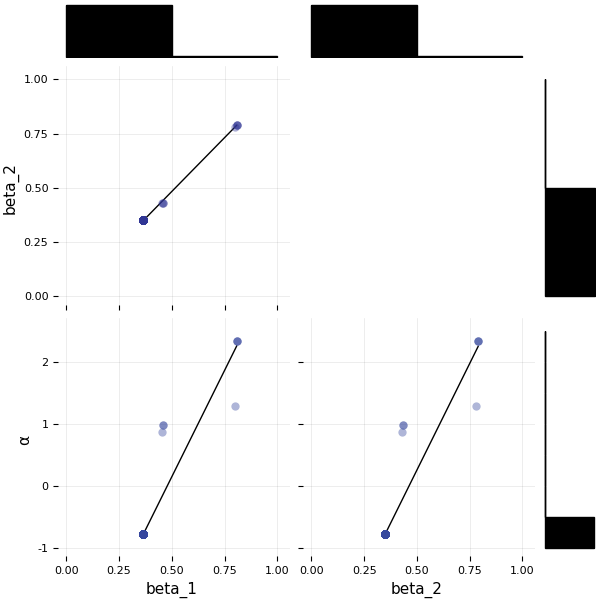

In [11]:
corner(chain)